<a href="https://colab.research.google.com/github/jvataidee/MachineLearning/blob/master/Regress%C3%B5es_sciki_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p align="center"><img src="https://static.wixstatic.com/media/bdd7cb_6ecb6c85550043f090237e5943d2647c~mv2.png/v1/fill/w_417,h_88,al_c,q_85,usm_0.66_1.00_0.01/Ativo%2023-8.webp" height="75px"></p>

**by: [João Ataíde](https://www.joaoataide.com)**
#**Regressõees com scikit-learn para engenharia civil**


---

<p align="center"><img src="https://static.wixstatic.com/media/bdd7cb_34d7fba4f6534455a82ed0089eebeeae~mv2.jpg"></p>


É muito comum em trabalhos de engenharia civil, utilizarmos diversos tipos de regressões para efetuar previsões de um determinado problemas, como a resitência de um material, ou até mesmo a eficiência de uma barragem.

Muitas vezes esses métodos de regressão estão estabelecidos em forma de equações, as quais comumente estão dispostas nas normas utilziadas. No entanto, essa habilidade de realizar esses calculos não é dispensada, tanto no merdados quando na academias.

No mercado de trabalho, destacasse por exemplo as atividades de investigação e controle de custos, como:  indices pluviométricos, evaporanspiração, estimativa de ruidos na contrução e demolição (RCD) e especial a precificação de imoveis.

Sendo uma das habilidades necessárias de um bom engenheiro, realizo o presente trabalho como forma de ajudar aqueles que necessitam utilizar de regresões, utilizando então um banco de dados real para prescificação de imoveis 

##Importandando Dados e Bibliotecas necessárias

In [45]:
#importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# configurar a visualização
sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Utilizarei o banco de dados House Prices: Advanced Regression Techniques [*dataset*](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). esse contem 79 variáveis relativas à imóveis de Ames, uma cidade localizada no estado americano de Iowa, e está disponível para download no Kaggle.

In [2]:
#Importando dados
df = "https://raw.githubusercontent.com/jvataidee/MachineLearning/master/dados/house_price.csv"
df = pd.read_csv(df)

#Cinco primeiras entradas
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,No,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,Gd,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,Mn,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,No,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,Av,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtExposure   1422 non-null   object 
 10  BsmtFinSF1     1460 non-null   int64  
 11  BsmtFinSF2     1460 non-null   int64  
 12  BsmtUnfSF      1460 non-null   int64  
 13  TotalBsmtSF    1460 non-null   int64  
 14  1stFlrSF       1460 non-null   int64  
 15  2ndFlrSF       1460 non-null   int64  
 16  LowQualFinSF   1460 non-null   int64  
 17  GrLivArea      1460 non-null   int64  
 18  BsmtFull

Correlação a gente pode pensar na linearização ......

##Regressão Linear

Preço somente levando em consideração a área

Selecionarei somente duas das camadas `GrLivArea` -  siginificado e `SalePrice` -  siginificado

In [4]:
df_rl = df.iloc[:, [17,38]]
df_rl.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


##Calculando correlação dos dados

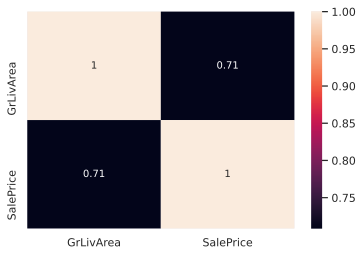

In [56]:
sns.heatmap(df_rl.corr(), annot=True)

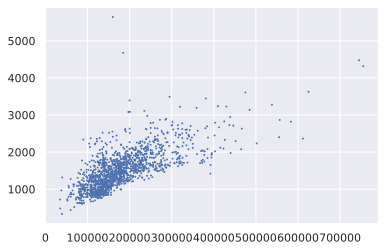

In [6]:
#Distribuir os dados 
plt.scatter(df_rl.SalePrice,df_rl.GrLivArea, s = 1);

explicar ...

##Aplicação do modelo

###1 Importar modelo de regressão

Documentação...

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Bibliotecas de analise de desempenho
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

###2 Escolher os hyperparameters

In [8]:
model =  LinearRegression()

###3 Separando *dataset*

Necessário Reshape ...

In [9]:
X = df_rl["GrLivArea"]
y = df_rl["SalePrice"]

#Mostrar tamanho dos dados
print("X:",X.shape)
print("y:",y.shape)

X: (1460,)
y: (1460,)


Por que fazer reshape?

In [10]:
X = X.values.reshape(-1,1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

###4 Treinando o modelo

In [12]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###5 Previsões dos dados

In [13]:
y_pred = model.predict(X_test)

In [14]:
y_pred[0]

177911.64425465115

###6 Análises do desenpenho do modelo

Se estamos falando de Regressão Linear, estamos falando de construir reta. Essa reta possui coeficientes associados com os ângulos de inclinação e intercepto. Neste caso específico da Regressão Linear Simples, temos apenas um coeficiente de regressão.

Para obtermos os **coeficiente de regressão** e **intercepto**, basta acessar os atributos do modelo diretamente da variável `ml_model`.

In [15]:
# imprimir os coeficientes
print("Coeficiente:\t", model.coef_)
print("Intercepto:\t", model.intercept_)

Coeficiente:	 [102.1918028]
Intercepto:	 25748.049889602727


Como estamos trabalhando com um problema de baixa dimensionalidade, é possível plotar a nossa reta, obtida pelo modelo de *Machine Learning* sobre os dados do nosso *dataset*. Veja como ela representa bem nosso conjunto de pontos.

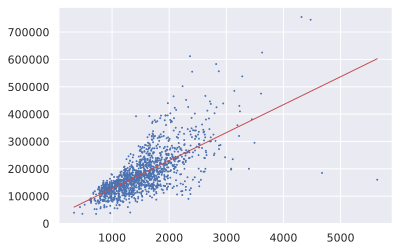

In [16]:
# plotar reta e dados
fig, ax = plt.subplots()
ax.scatter(X, y, s=1)
ax.plot(X, (model.coef_ * X + model.intercept_), 'r', linewidth=1);

In [17]:
#Desempenho do modelo
print("R2 Score:\t", r2_score(y_test, y_pred))
print("MAE:\t\t", mean_absolute_error(y_test, y_pred))
print("MSE:\t\t", mean_squared_error(y_test, y_pred))

R2 Score:	 0.5723418978269472
MAE:		 35699.30531853313
MSE:		 2870532862.866668


##Regressão Linear Múltipla


Explicar regressão


Neste caso usarei praticamente toda o data set, excluindo somente o dados do ID

In [18]:
df_rm = df

In [19]:
df_rm.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,No,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,Gd,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,Mn,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,No,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,Av,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [20]:
df_rm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtExposure   1422 non-null   object 
 10  BsmtFinSF1     1460 non-null   int64  
 11  BsmtFinSF2     1460 non-null   int64  
 12  BsmtUnfSF      1460 non-null   int64  
 13  TotalBsmtSF    1460 non-null   int64  
 14  1stFlrSF       1460 non-null   int64  
 15  2ndFlrSF       1460 non-null   int64  
 16  LowQualFinSF   1460 non-null   int64  
 17  GrLivArea      1460 non-null   int64  
 18  BsmtFull

In [21]:
df_rm.drop(["Id","BsmtExposure", 'GarageYrBlt','MasVnrArea',"LotFrontage"], axis=1, inplace=True)

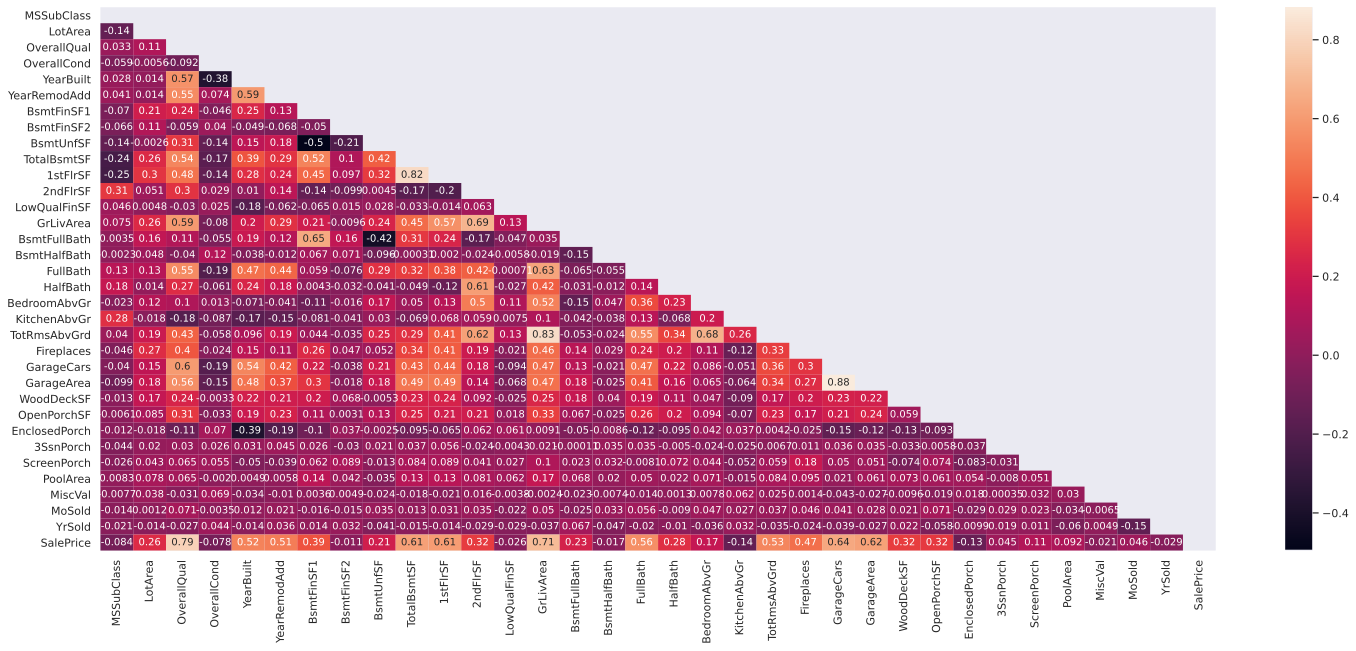

In [58]:
#Criar mascara para heatmap
mask = np.zeros_like(df_rm.corr())
mask[np.triu_indices_from(mask)] = True

#plotar heatmap
ax, fig =  plt.subplots(figsize =(25,10))
sns.heatmap(df_rm.corr(), annot = True, mask= mask);

##Aplicação do modelo

###1 Importar modelo de regressão

Documentação...

In [22]:
from sklearn.linear_model import LinearRegression

###2 Escolher os hyperparameters

In [23]:
model =  LinearRegression()

###3 Separando *dataset*

Necessário Reshape ...

In [24]:
X = df_rm.drop("SalePrice", axis = 1)
y = df_rm["SalePrice"]

Por que fazer reshape?

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

###4 Treinando o modelo

In [26]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###5 Previsões dos dados

In [27]:
y_pred = model.predict(X_test)

In [28]:
y_pred[0]

144382.4827160277

###6 Análises do desenpenho do modelo

In [29]:
# imprimir os coeficientes
print("Coeficiente:\t", model.coef_)
print("Intercepto:\t", model.intercept_)

Coeficiente:	 [-1.27179974e+02  5.72373983e-01  1.54875687e+04  5.30561603e+03
  3.58361231e+02  1.86657779e+02  2.24838460e+01 -3.79904220e+00
  1.99897765e+00  2.06837814e+01  2.89441643e+01  2.88103261e+01
 -2.46464726e+01  3.31080178e+01  1.95617939e+03 -1.87306877e+03
 -7.58681599e+02  1.42012107e+03 -1.19159872e+04 -1.36963168e+04
  3.81841312e+03  2.83435788e+03  6.14820561e+03  8.60265331e+00
  1.71522180e+01 -2.67913397e+01  1.99050089e+01 -1.75769535e+01
  1.07053002e+01  8.92867126e+01 -1.77967705e+00 -2.95525392e+02
 -3.44023246e+02]
Intercepto:	 -446955.15323950193


In [30]:
#Desempenho do modelo
print("R2 Score:\t", r2_score(y_test, y_pred))
print("MAE:\t\t", mean_absolute_error(y_test, y_pred))
print("MSE:\t\t", mean_squared_error(y_test, y_pred))

R2 Score:	 0.6475614316889727
MAE:		 23462.131897221196
MSE:		 2276831492.38736


##Regressão Logistica

Explicar regressão